In [1]:
import uniplot as up
import pandas as pd
import numpy as np
import uvarprob as uvpr
import matplotlib.pyplot as plt
import solvutil as sut

In [2]:
test_file = "/home/posypkin/tmp/tst.csv"

In [3]:
# Maximal number of steps
max_steps = 1e6
# Tolerance
epsilon = 1e-2
# If True - global Lipschitz constant is used
global_lipschitz_interval = True
# If True - the record value is taken from the test database
known_record = False
# How many points to skip in vizualization - regular step
skip = 2000

In [4]:
def read_problems(fname):
    data = pd.read_csv(fname, index_col = 'name', comment = '#')
    return data

In [5]:
df = read_problems(test_file)
df

,objective,a,b,min_f,min_x
name,,,,,
rshekel_0,1./(7.26231 * (10. * x - 1.34364)^2 + 0.25275)...,0,1,0.53993,0.42147


In [6]:
psl_lipint_points_list =  []
psl_lip_points_list = []
psqe_lipint_points_list =  []
psqe_lip_points_list = []

In [7]:
def log_point(x, points_list):
    points_list.append(x)

In [8]:
for test in df.itertuples():
    print(test)
    prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x, lambda x : log_point(x, psl_lipint_points_list))
    print(sut.psl(prob, sym = False))
    prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x, lambda x : log_point(x, psl_lip_points_list))
    print(sut.psl(prob, sym = True))
    prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x, lambda x : log_point(x, psqe_lipint_points_list))
    print(sut.psqe(prob, sym = False))
    prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x, lambda x : log_point(x, psqe_lip_points_list))
    print(sut.psqe(prob, sym = True))


Pandas(Index='rshekel_0', objective='1./(7.26231 * (10. * x - 1.34364)^2 + 0.25275) + 1./(3.96356 * (10. * x - 2.55069)^2 + 0.1899) + 1./(6.64323 * (10. * x - 6.51593)^2 + 0.11877) + 1./(7.13707 * (10. * x - 0.28347)^2 + 0.18655) + 1./(1.00844 * (10. * x - 7.6228)^2 + 0.18908) + 1./(2.12438 * (10. * x - 7.2154)^2 + 0.28905) + 1./(1.1261 * (10. * x - 9.01427)^2 + 0.10509) + 1./(8.2846 * (10. * x - 5.41412)^2 + 0.17624) + 1./(3.4012 * (10. * x - 2.16599)^2 + 0.10581) + 1./(3.51853 * (10. * x - 2.21692)^2 + 0.19916)', a=0, b=1, min_f=0.53993, min_x=0.42147)
TestResult(nsteps=551839, record_value=0.5399254341946542)
TestResult(nsteps=754797, record_value=0.5399254341946222)
TestResult(nsteps=18426, record_value=0.5399254345971413)
TestResult(nsteps=23631, record_value=0.539925434588658)


In [9]:
def vis_trials(points_list, num_series):
    poix = np.array(list(set(points_list[::skip])))
    poiy = np.full(len(poix), num_series * -0.5)
    up.plot_points(poix, poiy, num_series)

Pandas(Index='rshekel_0', objective='1./(7.26231 * (10. * x - 1.34364)^2 + 0.25275) + 1./(3.96356 * (10. * x - 2.55069)^2 + 0.1899) + 1./(6.64323 * (10. * x - 6.51593)^2 + 0.11877) + 1./(7.13707 * (10. * x - 0.28347)^2 + 0.18655) + 1./(1.00844 * (10. * x - 7.6228)^2 + 0.18908) + 1./(2.12438 * (10. * x - 7.2154)^2 + 0.28905) + 1./(1.1261 * (10. * x - 9.01427)^2 + 0.10509) + 1./(8.2846 * (10. * x - 5.41412)^2 + 0.17624) + 1./(3.4012 * (10. * x - 2.16599)^2 + 0.10581) + 1./(3.51853 * (10. * x - 2.21692)^2 + 0.19916)', a=0, b=1, min_f=0.53993, min_x=0.42147)


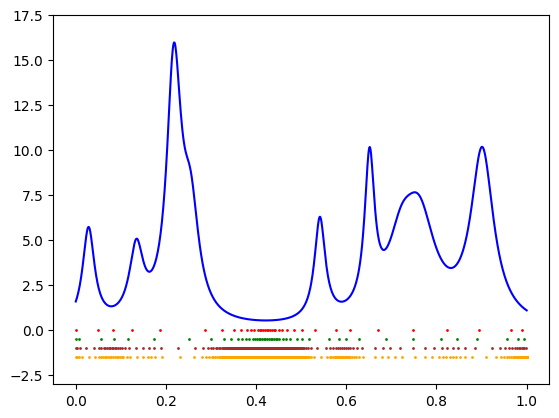

In [10]:
for test in df.itertuples():
    print(test)
    prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x)
    up.plot_problem(prob, {'function' : 'b-'})
    vis_trials(psqe_lipint_points_list, 0)
    vis_trials(psqe_lip_points_list, 1)
    vis_trials(psl_lipint_points_list, 2)
    vis_trials(psl_lip_points_list, 3)
